Within this notebook, graphviz files for MSRs are produced

In [1]:


from graphviz import Digraph
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as col
import scipy as sci
import dot2tex as d2t

In [2]:
msre = Digraph()
msre.attr(compound = 'true')

msre.node('A','Fuel salt in')

with msre.subgraph(name = 'cluster_1') as f:
    
    f.attr(label = 'Fuel Processing Cell')
    f.node('B', 'Gas supply tanks')
    f.node('C','High-temp NaF Absorber')
    f.node('D', 'Caustic scrubber')

msre.node('E', 'Portable UF6 absorber')
msre.node('F','Fuel salt out')

msre.edge('A','B',lhead = 'cluster_1')
msre.edge('B','C')
msre.edge('C','D')
msre.edge('D','E',ltail = 'cluster_1')
msre.edge('E','F')

msre.attr(ratio = 'auto')

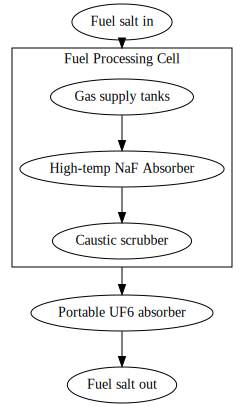

In [3]:
msre

In [79]:
#msre.render(filename = 'msre-proc', format = 'svg', cleanup = True)

'msre-proc.svg'

In [42]:
msbr = Digraph(name = 'msrb-offgas', format = 'svg', comment = 'MSBR Offgas')

In [43]:
viri = cm.get_cmap('viridis',7)

In [44]:
msbr.node('H','Fuel pump', shape = 'box')
msbr.node('A','Gas separator', shape = 'box')
msbr.node('B','Bubble generator', shape = 'box')
msbr.node('C','Entrainment separator', shape = 'box')
msbr.node('D','Particle trap')
msbr.node('E','Water-cooled charcoal beds')
msbr.node('F','Water detector & trap')
msbr.node('G','Decay and tritium removal')
msbr.node('I','Off-gas system seals')

In [45]:
c0 = col.to_hex(viri(6), keep_alpha = True)
c1 = col.to_hex(viri(3), keep_alpha = True)
c2 = col.to_hex(viri(0), keep_alpha = True)


msbr.edge('H','A','Fuel and gas (unclean)', color = c1, style = 'dashed')
msbr.edge('A','B','Fuel', color = c0)
msbr.edge('A','C','Gas (+fuel residue) (unclean)', color = c1, style = 'dashed')
msbr.edge('B','H','Fuel and gas (clean)', color = c0)
msbr.edge('F','B','Gas (clean)', color = c2, style = 'dotted')
msbr.edge('C','H','Fuel', color = c0)
msbr.edge('C','D','Gas (unclean): 9[scfm]', color = c2, style = 'dotted')
msbr.edge('H','D','Gas (unclean): 2[scfm]', color = c2, style = 'dotted')
msbr.edge('D','E','Gas (unclean)', color = c2, style = 'dotted')
msbr.edge('E','F','Gas (unclean): 9[scfm]', color = c2, style = 'dotted')
msbr.edge('E','G','Gas (unclean): 2[scfm]', color = c2, style = 'dotted')
msbr.edge('G','I','Gas (clean)', color = c2, style = 'dotted')

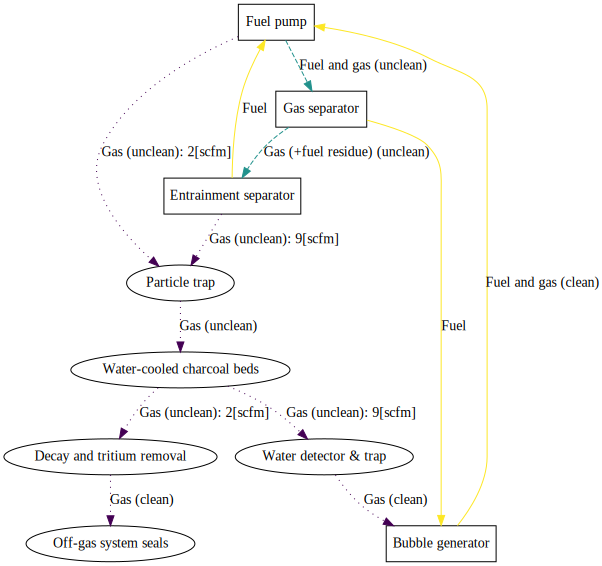

In [46]:
msbr
#blue-dashed: fuel/gas
#yellow-solid: fuel
#violet-dotted: gas

In [9]:
fpmsbr = Digraph(name = 'msre-proc', comment = 'MSRE processing')
fpmsbr.attr(compound = 'true')
with fpmsbr.subgraph(name = 'cluster_2') as r:
    r.attr(label = 'Reduction\nExtraction\nUsing Bismuth')
    r.node('A','Pa Removal\nThree Day Cycle')
    r.node('B','Rare Earth\nRemoval\nFifty Day\nCycle')
    
fpmsbr.node('C','Fuel In')
fpmsbr.node('D','Fuel Out')

fpmsbr.edge('C','A',lhead = 'cluster_2')
fpmsbr.edge('A','B')
fpmsbr.edge('B','D',ltail = 'cluster_2')

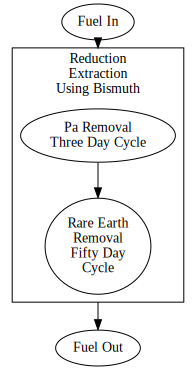

In [10]:
fpmsbr

In [49]:
msdr = Digraph(name = 'msdr-proc', comment = 'msdr-proc')

msdr.node('A','Fuel pump', shape = 'box')
msdr.node('B','Bubble generator', shape = 'box')
msdr.node('C','Gas separator', shape = 'box')
msdr.node('D','Drain tank')
msdr.node('E','Particle trap')
msdr.node('F','Charcoal beds')
msdr.node('G','To safety purge points')


msdr.edge('A','B','Fuel (unclean)',color = c0)
msdr.edge('B','C','Fuel and gas (unclean)',color = c1, style = 'dashed')
msdr.edge('C','D','Gas (unclean)', color = c2, style = 'dotted')
msdr.edge('C','A','Fuel (clean)',color = c0)
msdr.edge('D','E','Gas (unclean)',color = c2, style = 'dotted')
msdr.edge('E','B','Gas (clean)',color = c2, style = 'dotted')
msdr.edge('E','F','Gas (clean)',color = c2, style = 'dotted')
msdr.edge('F','G','Gas (clean)',color = c2, style = 'dotted')

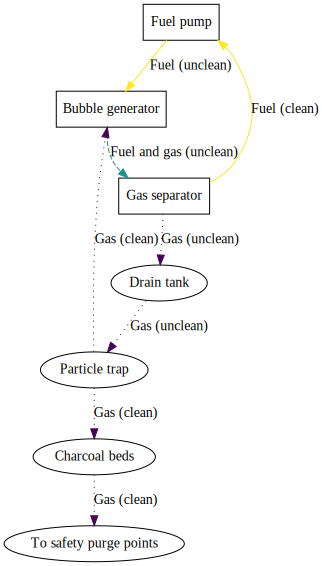

In [50]:
msdr

In [57]:
msdro = Digraph(name = 'msdr-overview',comment = 'msdr proc overview')
msdro.attr(compound = 'true')
msdro.attr(rankdir = 'TB')
msdro.attr(splines = 'ortho')

msdro.node('A','Reactor')
msdro.node('B','Pump inlet')
msdro.node('C','Pump outlet')
msdro.node('D','Off-gas system')

with msdro.subgraph(name = 'cluster_3') as hx:
    hx.node('HX','Heat exchanger')

msdro.edge('A','B',constraint = 'true')
msdro.edge('B','C')
msdro.edge('C','HX',lhead = 'cluster_3')
msdro.edge('HX','A',ltail = 'cluster_3',constraint = 'false')
msdro.edge('D','B')
msdro.edge('C','D')

with msdro.subgraph(name = 'cluster_4') as hx:
    hx.node('HX2','Heat exchanger')
    
msdro.edge('HX','HX2',ltail = 'cluster_3',lhead = 'cluster_4')
msdro.edge('HX2','HX',ltail = 'cluster_4',lhead = 'cluster_3')

msdro.node('E','Tertiary HITEC loop')

msdro.edge('HX2','E', ltail = 'cluster_4')
msdro.edge('E','HX2',lhead = 'cluster_4')

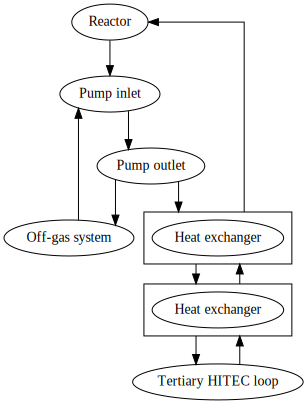

In [58]:
msdro

In [59]:
msregas = Digraph(name = 'msre-gas',comment = 'msre-cover-gas')
msregas.attr(compound = 'true')

msregas.node('A','Gas: 200 cubic feet per day')
msregas.node('B','Pump bowl')

with msregas.subgraph(name = 'cluster_5') as c:
    c.attr(label = 'Charcoal absorber beds')
    c.node('C','Xenon holdup: 90 days')
    c.node('D','Krypton holdup: 7.5 days')
    
msregas.edge('A','B')
msregas.edge('B','C',lhead = 'cluster_5')

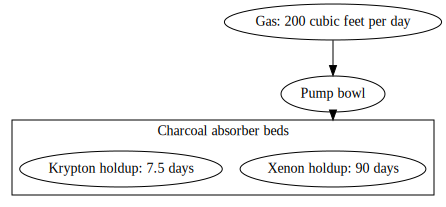

In [60]:
msregas

In [63]:
dmsr = Digraph(name = 'dmsr',comment = 'dmsr-proc')
dmsr.attr(splines = 'ortho')
dmsr.attr(rankdir = 'TB')

dmsr.node('A','Reactor')
dmsr.node('B','Primary loop')
dmsr.node('C','Off-Gas bypass loop')

dmsr.edge('A','B')
dmsr.edge('B','A')
dmsr.edge('B','C',xlabel = '10% of fuel')
dmsr.edge('C','B')

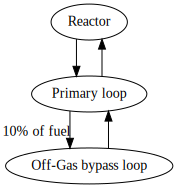

In [64]:
dmsr

In [65]:
msfrb = Digraph(name = 'msfrbubble',comment = 'msfr-bubble')
msfrb.attr(compound = 'true')
msfrb.attr(rankdir = 'LR')

msfrb.node('A','Bubble generator')

with msfrb.subgraph(name = 'cluster_6') as b:
    b.attr(label = 'Core')
    b.node('B','Salt injector')
    b.node('C','Gas separator')
    
msfrb.node('D','Holdup\nTank')
msfrb.node('E','Filtration')
msfrb.node('F','Waste')
msfrb.node('G','Storage: 3 months')

msfrb.edge('A','B',lhead = 'cluster_6')
msfrb.edge('B','C',constraint = 'false')
msfrb.edge('C','D',ltail = 'cluster_6',constraint = 'false')
msfrb.edge('D','E',constraint = 'false')
msfrb.edge('E','F','Metallic residue')
msfrb.edge('E','G',xlabel =' Gas: 0.017%',constraint = 'false')
msfrb.edge('E','A',xlabel = 'Gas: 99.983%', constraint = 'false')

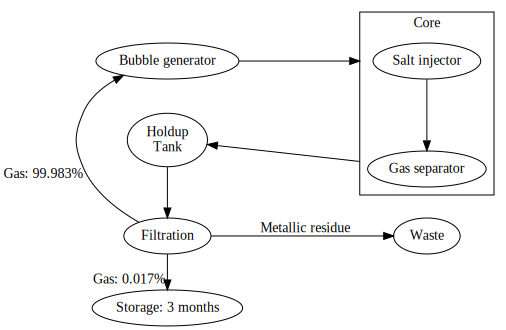

In [66]:
msfrb

In [67]:
msfrp = Digraph(name = 'msfrpyro',comment = 'msfr-pyro-unit')
msfrp.attr(compound = 'true')

with msfrp.subgraph(name = 'cluster_7') as p:
    p.attr(label = 'For fuel salts')
    p.node('A','Remove portion of salt')
    p.node('B','Fluorination: extracts 99% uranium, 90% plutonium')
    p.node('C','Reduction-extraction (twice through)')
    p.node('D','Lanthanide removal (~20 Times Through)')
    p.node('E','Water hydrolysis')
    p.node('F','Anodic reaction: removed actinides returned to fuel')
    p.node('J','Return to fuel salt')
    
    p.edge('A','B')
    p.edge('B','C')
    p.edge('C','D')
    p.edge('D','E')
    p.edge('E','F')
    p.edge('F','J')

with msfrp.subgraph(name = 'cluster_8') as y:
    y.attr(label = 'For fertile blanket')
    y.node('G','Remove portion of salt')
    y.node('H','Fluorination')
    y.node('I','Reduction-extraction')
    y.node('K','Return to fertile blanket')
    y.edge('G','H')
    y.edge('H','I')
    y.edge('I','K')

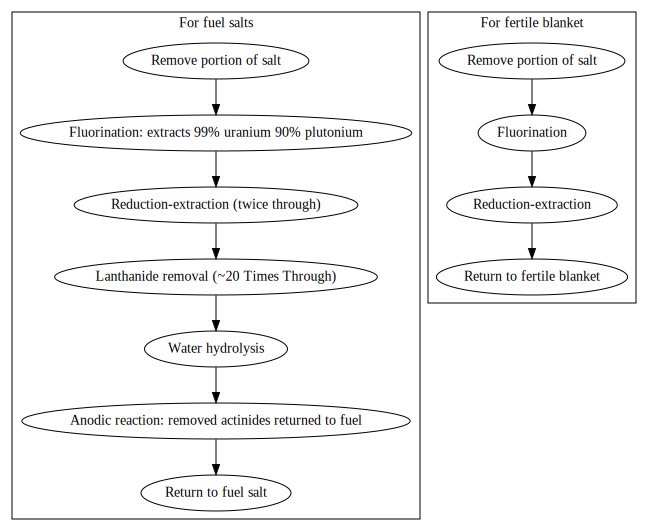

In [68]:
msfrp

In [23]:
#commenting out this cell so the notebook doesn't make extra copies

#msre.render(filename = 'msre-proc', format = 'png', cleanup = True)
#msbr.render(filename = 'msbr-offgas',format = 'png', cleanup = True)
#fpmsbr.render(filename = 'msbr-proc',format = 'png', cleanup = True)
#msdr.render(filename = 'msdr-offgas',format = 'png',cleanup = True)
#msdro.render(filename ='msdr-overview',format = 'png', cleanup = True)
#msregas.render(filename = 'msre-offgas',format = 'png', cleanup = True)
#dmsr.render(filename = 'dmsr-proc',format = 'png',cleanup = True)
#msfrb.render(filename = 'msfr-offgas',format = 'png', cleanup = True)
#msfrp.render(filename = 'msfr-proc',format = 'png', cleanup = True)